In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [2]:
data_path = 'titanic_modified_dataset.csv'

df = pd.read_csv(data_path, index_col='PassengerId')

df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


In [ ]:
# Split into X, y
dataset_arr = df.to_numpy().astype(np.float64)

X, y = dataset_arr[:, :-1], dataset_arr[:, -1]


[[ 3.      0.     22.     ...  7.25    0.      0.    ]
 [ 1.      1.     38.     ... 71.2833  1.      1.    ]
 [ 3.      1.     26.     ...  7.925   0.      2.    ]
 ...
 [ 3.      1.     28.     ... 23.45    0.      2.    ]
 [ 1.      0.     26.     ... 30.      1.      0.    ]
 [ 3.      0.     32.     ...  7.75    2.      0.    ]]
[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 

In [8]:
# Add bias to X
intercept = np.ones((X.shape[0], 1))

print(intercept.shape)
X_b = np.concatenate((intercept, X), axis=1)
print(X_b)

(891, 1)
[[ 1.      3.      0.     ...  7.25    0.      0.    ]
 [ 1.      1.      1.     ... 71.2833  1.      1.    ]
 [ 1.      3.      1.     ...  7.925   0.      2.    ]
 ...
 [ 1.      3.      1.     ... 23.45    0.      2.    ]
 [ 1.      1.      0.     ... 30.      1.      0.    ]
 [ 1.      3.      0.     ...  7.75    2.      0.    ]]


In [9]:
# Split into train, val, test
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)



In [11]:
# Standardize data
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])





In [36]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Predict
def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)

    return y_hat


# Compute loss
def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)

    return (
        -y * \
        np.log(y_hat) - (1 - y) * \
        np.log(1 - y_hat)
    ).mean()


# Compute gradient
def compute_gradient(X, y, y_hat):
    return np.dot(
        X.T, (y_hat - y)
    ) / y.size


# Update weights
def update_theta(theta, gradient, lr):
    return theta - lr * gradient


# Compute accuracy
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()

    return acc

In [37]:
# Initialize hyperparameters
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(
    size=X_train.shape[1]
)

print(theta)

[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678  0.33033482
 0.20464863 0.61927097 0.29965467]


In [54]:
# Train the model

def train_model(theta):
    train_accs = []
    train_losses = []
    val_accs = []
    val_losses = []
    

    for epoch in range(epochs):
        train_batch_losses = []
        train_batch_accs = []
        val_batch_losses = []
        val_batch_accs = []

        for i in range(0, X_train.shape[0], batch_size):
            X_i = X_train[i: i+batch_size]
            y_i = y_train[i: i+batch_size]

            y_hat = predict(X_i, theta)

            train_loss = compute_loss(y_hat, y_i)

            gradient = compute_gradient(X_i, y_i, y_hat)

            theta = update_theta(theta, gradient, lr)

            train_batch_losses.append(train_loss)

            train_acc = compute_accuracy(X_train, y_train, theta)
            train_batch_accs.append(train_acc)

            y_val_hat = predict(X_val, theta)
            val_loss = compute_loss(y_val_hat, y_val)
            val_batch_losses.append(val_loss)

            val_acc = compute_accuracy(X_val, y_val, theta)
            val_batch_accs.append(val_acc)

        # Afer each epoch, summarize
        train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
        val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)

        train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
        val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

        train_losses.append(train_batch_loss)
        val_losses.append(val_batch_loss)
        train_accs.append(train_batch_acc)
        val_accs.append(val_batch_acc)

        # print(f"\nEPOCH {epoch+1}:\tTraining loss: {train_batch_loss:.3f}\
        #       \tValidation loss: {val_batch_loss:.3f}")





    return {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracy': train_accs,
        'val_accuracy': val_accs,
        'theta': theta
    }


outputs = train_model(theta)


Text(0.5, 1.0, 'Validation Accuracy')

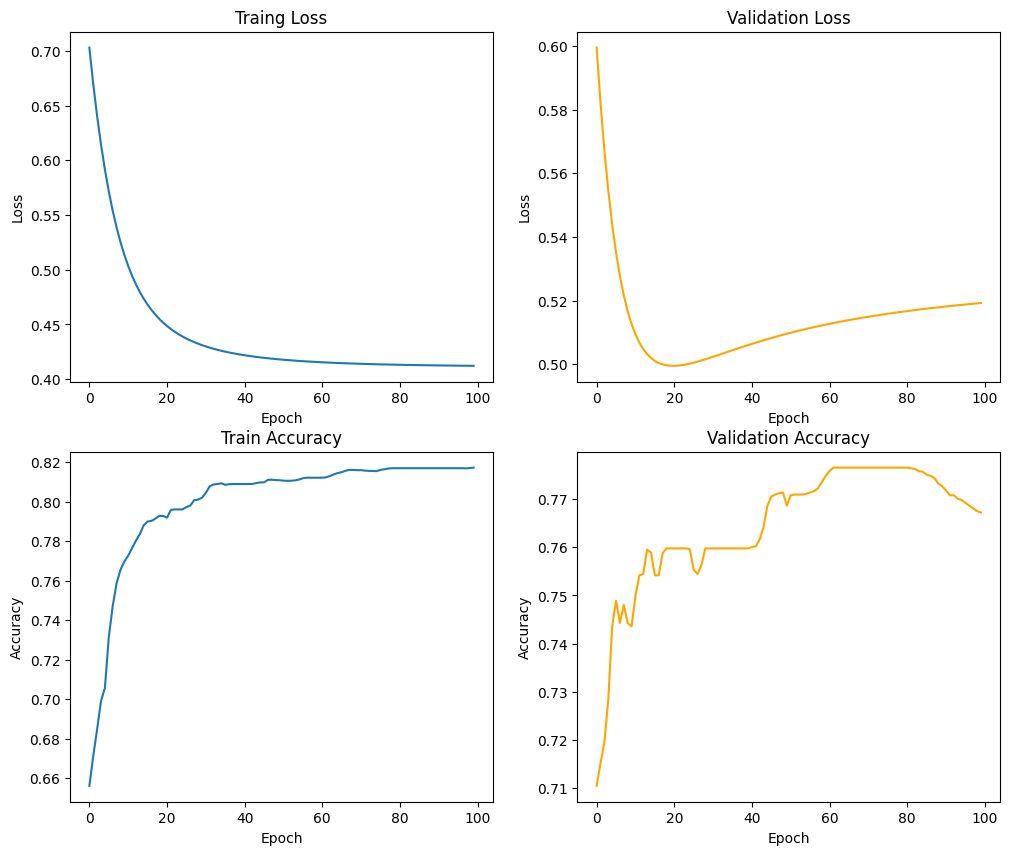

In [55]:
# Plot charts
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(outputs['train_losses'])
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Traing Loss')

ax[0, 1].plot(outputs['val_losses'], 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(outputs['train_accuracy'])
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Train Accuracy')

ax[1, 1].plot(outputs['val_accuracy'], 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

In [56]:
# Evaluate the model
theta = outputs['theta']
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f"\tAccuracy for validation: {val_set_acc}")
print(f"\tAccuracy for test: {test_set_acc}")


Evaluation on validation and test set:
	Accuracy for validation: 0.770949720670391
	Accuracy for test: 0.7752808988764045


In [57]:
X = [[22.3, -1.5, 1.1, 1]]
theta_new = [0.1, -0.15, 0.3, -0.2]

predict(X, theta_new)

array([0.92988994])

In [59]:
y = np.array([1, 0, 0, 1])
y_hat = np.array([0.8, 0.75, 0.3, 0.95])

compute_loss(y_hat, y)

0.5043515376900958

In [64]:
X = np.array([[1, 2], [2, 1], [1, 1], [2, 2]])
y_true = np.array([0, 1, 0, 1])
y_pred = np.array([0.25, 0.75, 0.4, 0.8])

compute_gradient(X, y_true, y_pred)

array([-0.0625,  0.0625])

In [67]:
y_true = np.array([1, 0, 1, 1])
y_pred = np.array([0.85, 0.35, 0.9, 0.75])

def compute_accuracy_2(y_true, y_pred):
    y_pred_rounded = np.round(y_pred)
    print(y_pred_rounded)

    accuracy = np.mean(y_true == y_pred_rounded)

    return accuracy

compute_accuracy_2(y_true, y_pred)

[1. 0. 1. 1.]


1.0